<a href="https://colab.research.google.com/github/eliyanto29/Data-Science-Academy/blob/master/Registration_Task_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET**



Didapatkan dari https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv dengan sedikit modifikasi.
Dataset merupakan data mobil bekas yang terdapat di india yang terdiri 6019 baris dan 12 kolom. Kolom yang terdapat pada dataset meliputi:

* **Name**              : Nama merek dan model mobil

* **Location**          : Lokasi mobil dijual

* **Year**              : Tahun edisi mobil

* **Kilometers_Driven** : Total jarak pemakaian mobil oleh pengguna sebelumnya dalam satuan kilometer

* **Fuel_Type**         : Tipe bahan bakar yang digunakan mobil (Petrol/Diesel/Electric/CNG/LPG)

* **Transmission**      : Tipe transmisi yang digunakan mobil (Automatic/Manual)

* **Owner_Type**        : Jenis kepemilikan mobil (First/Second/Third/Fourth & Above)

* **Mileage**           : Tingkat konsumsi bahan bakar dalam satuan kmpl atau km/kg

* **Engine**            : Kapasitas mesin mobil dalam satuan CC

* **Power**             : Tenaga maksimum dari mesin mobil dalam satuan bph

* **Seats**             : Jumlahlah kursi pada mobil

* **Price**             : Harga mobil bekas dalam satuan INR Lakhs (Indian Rupee)



# Soal:


1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek
tersebut?
2. Kota apa yang memiliki mobil bekas paling banyak?
3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?
4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?
5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah
atau tinggi? Sertakan argumen yang mendukung jawaban.
6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang
mendukung jawaban.
7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan
argumen yang mendukung jawaban.
8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?
9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?
10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan
argumen yang mendukung jawaban.

Selain dari 10 soal di atas, kalian dianjurkan untuk membuat analisis-analisis tambahan
mengenai dataset tersebut untuk mendapatkan insight yang lebih banyak.

# **Preparation**

Mengimpor modul yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Membuka dataset

In [ ]:
cars = pd.read_csv('https://raw.githubusercontent.com/eliyanto29/Data-Science-Academy/master/used_car_data.csv')

In [ ]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


Eksplorasi data

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Jumlah mobil bekas berdasarkan *Fuel_Type*

In [ ]:
print('Fuel_Type')
cars['Fuel_Type'].value_counts()

Fuel_Type


Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Jumlah mobil bekas berdasarkan *Transmission*

In [ ]:
print('Transmission')
cars['Transmission'].value_counts()

Transmission


Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

Jumlah mobil bekas berdasarkan *Owner_Type*

In [ ]:
print('Owner_Type')
cars['Owner_Type'].value_counts()

Owner_Type


First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

Statistik Deskriptif Dataset

In [ ]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Mengecek *Missing Value* pada dataset

In [ ]:
cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

## Data Preparation

Mengecek dan menghapus baris yang mengandung *Missing Value*

In [ ]:
#Mengecek dan menghapus baris yang mengandung Missing Value pada kolom Mileage
cars[cars['Mileage'].isnull()]
#4446
#4904

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [ ]:
#Menghapus rows in Mileage with missing value
cars2=cars.drop([cars.index[4446], cars.index[4904]])
cars2.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
list1=cars2[cars2['Engine'].isnull()].index.tolist()
print(list1)
rows = cars2.index[list1]
cars2.drop(rows, inplace=True)
cars2.isnull().sum()

[194, 208, 733, 749, 1294, 1327, 1385, 1460, 2074, 2096, 2264, 2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404, 3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952, 5015, 5185, 5270]


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                8
Power                 8
Seats                14
Price                 0
dtype: int64

In [ ]:
cars3=cars2.sort_values(by=['Seats'])
cars3.reset_index(drop=True, inplace=True)
cars3

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.00
1,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,83.96
2,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,29.50
3,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0 kmpl,5461 CC,421 bhp,2.0,90.00
4,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.37 kmpl,2979 CC,306 bhp,2.0,58.54
...,...,...,...,...,...,...,...,...,...,...,...,...
5976,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6 kmpl,NaN,NaN,NaN,1.49
5977,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,1.60
5978,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.65
5979,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.85


In [ ]:
cars4=cars3[:5949]
cars4.isnull().sum()
#cars4

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
data=cars4

Menghilangkan satuan pada dataset angka

In [ ]:
data['Mileage']=data['Mileage'].str.replace('kmpl','') #menghapus karakter kmpl
data['Mileage']=data['Mileage'].str.replace('km/kg','') #menghapus karakter km/kg
data['Engine']=data['Engine'].str.replace('CC','') #menghapus karakter CC
data['Power']=data['Power'].str.replace('bhp','') #menghapus karakter bhp
data['Power']=data['Power'].str.replace('null','0') #mengganti karakter null dengan string 0
data['Power'].replace(np.nan, '0', inplace=True) #mengganti missing vlaue pada kolom Power dengan string 0
data['Power']=data['Power'].astype(float) #mengkonversi kolom Power dalam float

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Menambah Kolom Merk

In [ ]:
data['Name']=data['Name'].astype(str)
Merk=data.Name.str.split().str.get(0)
data['Merk']=Merk
data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
0,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,0.00,0.0,18.00,Audi
1,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.0,2996,362.07,2.0,83.96,Mercedes-Benz
2,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1,5461,387.30,2.0,29.50,Mercedes-Benz
3,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0,5461,421.00,2.0,90.00,Mercedes-Benz
4,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.37,2979,306.00,2.0,58.54,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,Mahindra Scorpio 2.6 CRDe,Bangalore,2005,60000,Diesel,Manual,First,10.5,2179,120.00,8.0,4.00,Mahindra
5945,Mahindra Scorpio SLE BSIV,Delhi,2011,85000,Diesel,Manual,First,12.05,2179,120.00,8.0,5.25,Mahindra
5946,Toyota Innova 2.5 GX (Diesel) 8 Seater,Delhi,2013,91200,Diesel,Manual,First,12.99,2494,100.00,8.0,8.25,Toyota
5947,Maruti Omni E MPI STD BS IV,Jaipur,2015,15000,Petrol,Manual,First,16.8,796,34.20,8.0,2.35,Maruti


# Assigment

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
0,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,0.00,0.0,18.00,Audi
1,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.0,2996,362.07,2.0,83.96,Mercedes-Benz
2,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1,5461,387.30,2.0,29.50,Mercedes-Benz
3,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0,5461,421.00,2.0,90.00,Mercedes-Benz
4,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.37,2979,306.00,2.0,58.54,BMW


###1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?

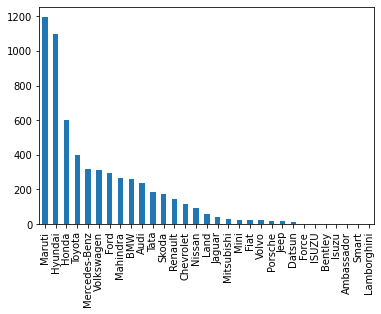

In [ ]:
data['Merk'].value_counts().plot.bar()

In [ ]:
datakm['Merk'].value_counts()

###2. Kota apa yang memiliki mobil bekas paling banyak?

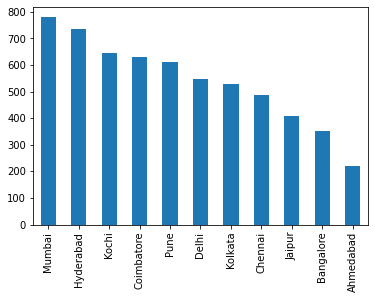

In [ ]:
data['Location'].value_counts().plot.bar()

In [ ]:
Kota=data['Location'].value_counts()
print(Kota)

Mumbai        779
Hyderabad     736
Kochi         647
Coimbatore    632
Pune          611
Delhi         548
Kolkata       528
Chennai       487
Jaipur        409
Bangalore     351
Ahmedabad     221
Name: Location, dtype: int64


***Jawab:*** Kota yang memiliki mobil bekas terbanyak adalah **Mumbai** dengan **779** mobil bekas

###3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

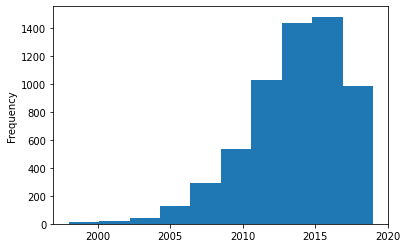

In [ ]:
data['Year'].plot.hist()

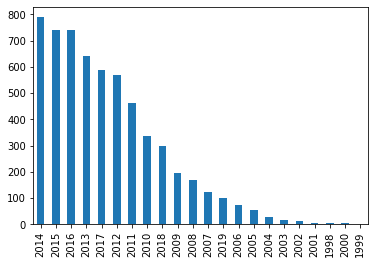

In [ ]:
data['Year'].value_counts().plot.bar()

In [ ]:
data['Year'].value_counts()

2014    789
2015    740
2016    739
2013    643
2017    586
2012    569
2011    461
2010    338
2018    297
2009    195
2008    169
2007    122
2019    102
2006     75
2005     53
2004     27
2003     15
2002     13
2001      6
1998      4
2000      4
1999      2
Name: Year, dtype: int64

###4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

In [ ]:
Mobil=data[data['Kilometers_Driven']<100000]

print(Mobil['Name'].value_counts())

Mahindra XUV500 W8 2WD                           44
Maruti Swift VDI                                 41
Maruti Swift Dzire VDI                           32
Honda City 1.5 S MT                              31
Hyundai i10 Sportz                               30
                                                 ..
Ford Fiesta 1.6 SXI ABS Duratec                   1
BMW 7 Series 730Ld Design Pure Excellence CBU     1
Mahindra KUV 100 mFALCON D75 K4 Plus 5str         1
Skoda Rapid 1.5 TDI Style                         1
Honda Amaze VX Diesel                             1
Name: Name, Length: 1736, dtype: int64


**Jawab**: Jumlah Mobil dengan jarak pemaikaian di bawah 100.000 km adalah **1736** mobil dari 5949

###5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.

In [ ]:
maks=data['Kilometers_Driven'].max()
print(maks)
mnm=data['Kilometers_Driven'].min()
print(mnm)
stds=data['Kilometers_Driven'].std()
print(stds)
means=data['Kilometers_Driven'].mean()
print(means)
medians=data['Kilometers_Driven'].median()
print(medians)

6500000
171
91647.85033766739
58516.46058161036
53000.0


**Jawab**: Kendaraan dengan kilometer tinggi adalah kendaraan dengan jumlah kilometer penggunaan **lebih dari 50 km**. Sumber: [Artikel](https://www.business-standard.com/article/news-cd/myth-busted-should-you-buy-a-used-car-based-only-on-kilometres-driven-116051101185_1.html)

Berdasar dataset yang ada, jika kita akan mengklasifikasikan data Kilometers_Driven menjadi dua kelas(rendah dan tinggi), maka ada dua alternatif yaitu dibatasi dengan mean dan median. 

Jika dibatasai dengan mean, maka kendaraan dengan kilometer tinggi adalah kendaraan yang memiliki jumlah kilometer **lebih dari 57.000 km.** 

Sedangkan jika dibatasi dengan median, maka kendaraan dengan kilometer tinggi adalah kendaraan yang memiliki jumlah kilometer **lebih dari 53.000 km**. Hasil ini tidak beda jauh dari artikel di atas.

###6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.

In [ ]:
maks=data['Kilometers_Driven'].max()
print(maks)
mnm=data['Kilometers_Driven'].min()
print(mnm)
stds=data['Kilometers_Driven'].std()
print(stds)
means=data['Kilometers_Driven'].mean()
print(means)
medians=data['Kilometers_Driven'].median()
print(medians)

6500000
171
91647.85033766739
58516.46058161036
53000.0


In [ ]:
data2=data.sort_values(by=['Kilometers_Driven'],ascending=False)
data2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
4163,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.00,5.0,65.00,BMW
3617,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3,1968,141.00,5.0,7.50,Skoda
4988,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598,103.60,5.0,5.90,Volkswagen
3557,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197,78.90,5.0,2.70,Hyundai
751,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4,1497,117.30,5.0,5.00,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17,799,53.30,5.0,3.40,Renault
4345,Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,Manual,First,20.89,1197,81.80,5.0,6.36,Maruti
3719,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9,1197,81.86,5.0,6.50,Hyundai
1536,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5,1197,81.80,5.0,6.25,Maruti


In [ ]:
data2[data2['Kilometers_Driven']==6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
4163,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.0,5.0,65.0,BMW


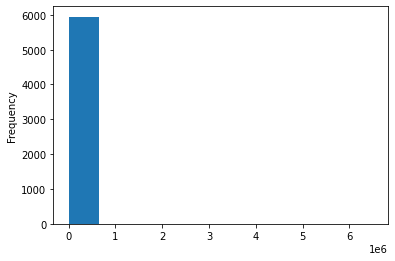

In [ ]:
data2['Kilometers_Driven'].plot.hist()

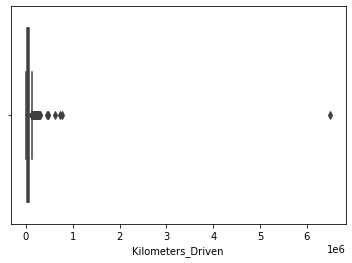

In [ ]:
import seaborn as sns
sns.boxplot(x=data2['Kilometers_Driven'])

**Jawab**: Ada, Jarak pemakaian dengan jumlah 6.500.000 km jelas-jelas merupakan outlier(pencilan), data ini akan dihapus untuk analisis selanjutnya

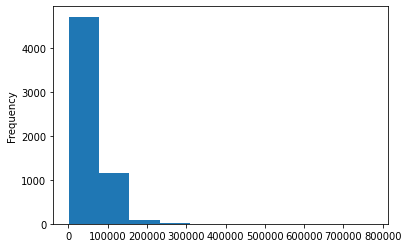

In [ ]:
datakm=data.sort_values(by=['Kilometers_Driven'],ascending=False)
datakm.reset_index(drop=True, inplace=True)
datakm=datakm[1::]
datakm
datakm['Kilometers_Driven'].plot.hist()

In [ ]:
maks=datakm['Kilometers_Driven'].max()
print(maks)
mnm=datakm['Kilometers_Driven'].min()
print(mnm)
stds=datakm['Kilometers_Driven'].std()
print(stds)
means=datakm['Kilometers_Driven'].mean()
print(means)
medians=datakm['Kilometers_Driven'].median()
print(medians)

775000
171
37715.84849784455
57433.49428379287
53000.0


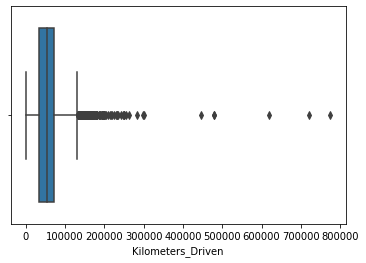

In [ ]:
import seaborn as sns
sns.boxplot(x=datakm['Kilometers_Driven'])

In [ ]:
datakm.Kilometers_Driven.describe()

count      5948.000000
mean      57433.494284
std       37715.848498
min         171.000000
25%       33798.250000
50%       53000.000000
75%       72768.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

count      5948.000000
mean      57433.494284
std       37715.848498
min         171.000000
25%       33798.250000
50%       53000.000000
75%       72768.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

Data dalam DataFrame **datakm** juga masih memiliki outlier, terlihat dari grafik bintang pada boxplot. 

###7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Year", y="Kilometers_Driven", color="Transmission",
                 title="Total Jarak Pemakaian Mobile Bekas berdasarkan Tahun Pembuatan",
                )

fig.show()

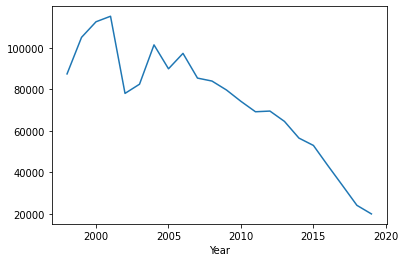

In [ ]:
datakm.groupby('Year').mean()['Kilometers_Driven'].plot.line()

**Jawab**: Hubungan antara jarak pemakaian dan tahun pembuatan adalah semakin baru tahun pembuatan maka semakin sedikit jarak pemakaian mobil bekas tersebut.

###8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

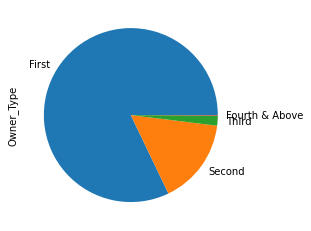

In [ ]:
datakm['Owner_Type'].value_counts().plot.pie()

In [ ]:
datakm['Owner_Type'].value_counts()

First             4884
Second             948
Third              110
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [ ]:
MobilLawas = datakm.loc[(cars['Owner_Type'] == 'Third') | (datakm['Owner_Type'] == 'Fourth & Above')]
MobilLawas['Owner_Type'].count()

117

**Jawab**: Jumlah mobil bekas engan kepemilikan ketiga atau lebih adalah 117 mobil

###9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

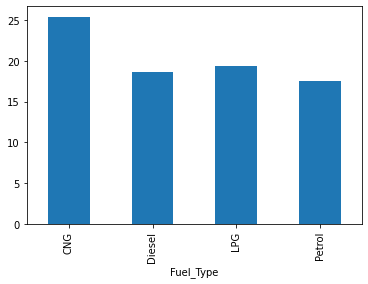

In [ ]:
datakm['Mileage']=datakm['Mileage'].astype(float)
datakm.groupby('Fuel_Type').mean()['Mileage'].plot.bar()

In [ ]:
datakm.groupby('Fuel_Type').mean()['Mileage']

Fuel_Type
CNG       25.418036
Diesel    18.674937
LPG       19.385000
Petrol    17.486461
Name: Mileage, dtype: float64

**Jawab**: Jenis bahan bakar yang paling hemat(semakin besar nilai Mileage) adalah CNG yaitu rata-rata 25.41 km/l

### 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

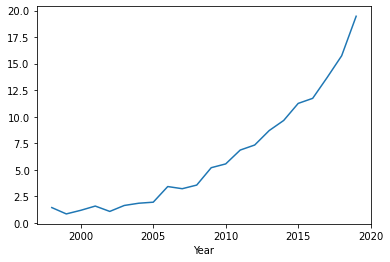

In [ ]:
datakm.groupby('Year').mean()['Price'].plot.line()

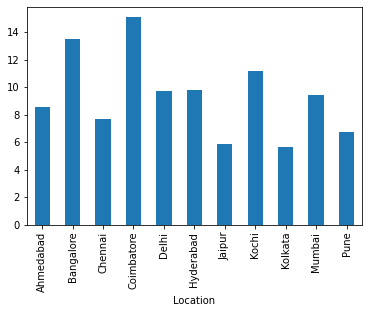

In [ ]:
datakm.groupby('Location').mean()['Price'].plot.bar()

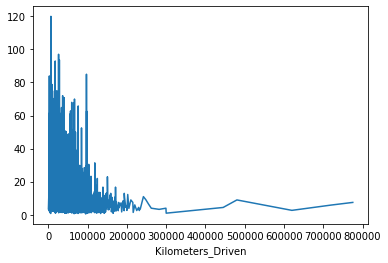

In [ ]:
datakm.groupby('Kilometers_Driven').mean()['Price'].plot.line()

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Kilometers_Driven", y="Price", color="Transmission",
                 title="Used Car Price based on Year",
                )

fig.show()

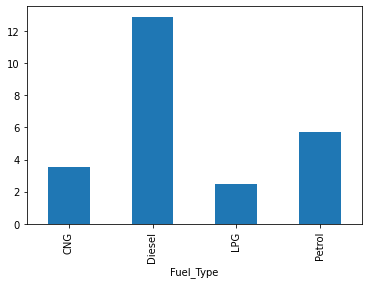

In [ ]:
datakm.groupby('Fuel_Type').mean()['Price'].plot.bar()

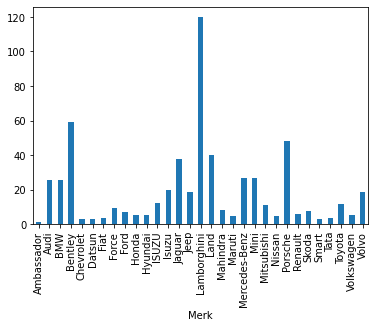

In [ ]:
datakm.groupby('Merk').mean()['Price'].plot.bar()

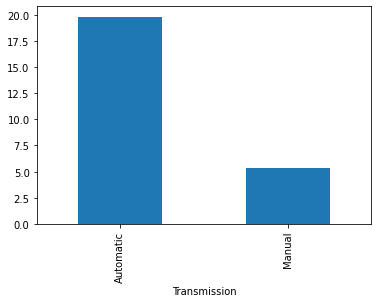

In [ ]:
datakm.groupby('Transmission').mean()['Price'].plot.bar()

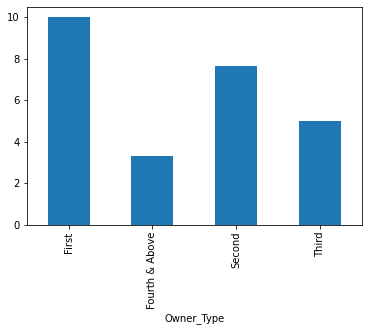

In [ ]:
datakm.groupby('Owner_Type').mean()['Price'].plot.bar()

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Mileage", y="Price", color="Transmission",
                 title="Harga Mobil Bekas berdasarkan Mileage",
                )

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Engine", y="Price", color="Transmission",
                 title="Harga Mobil Bekas berdasarkan Engine",
                )

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Power", y="Price", color="Transmission",
                 title="Harga Mobil Bekas berdasarkan Power",
                )

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(datakm, x="Seats", y="Price", color="Transmission",
                 title="Harga Mobil Bekas berdasarkan Seats",
                )

fig.show()

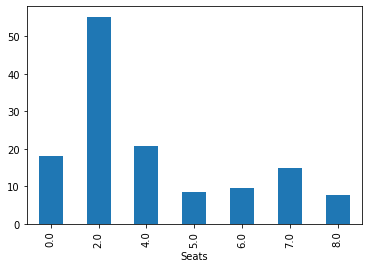

In [ ]:
datakm.groupby('Seats').mean()['Price'].plot.bar()

In [ ]:
datakm

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
1,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,1,First,19.30,1968,141.00,5.0,7.50,Skoda
2,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,2,First,20.54,1598,103.60,5.0,5.90,Volkswagen
3,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,2,First,20.36,1197,78.90,5.0,2.70,Hyundai
4,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,2,First,17.40,1497,117.30,5.0,5.00,Honda
5,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,1,First,16.96,1968,138.03,5.0,13.00,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,Renault KWID RXL,Pune,2018,1000,Petrol,2,First,25.17,799,53.30,5.0,3.40,Renault
5945,Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,2,First,20.89,1197,81.80,5.0,6.36,Maruti
5946,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,2,First,18.90,1197,81.86,5.0,6.50,Hyundai
5947,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,1,First,21.50,1197,81.80,5.0,6.25,Maruti


In [ ]:
datacor=datakm
#transmission = {'Automatic': 1,'Manual': 2} 
#datacor.Transmission = [transmission[item] for item in datacor.Transmission] 
ownertype = {'First': 4,'Second': 3, 'Third':2, 'Fourth & Above':1} 
datacor.Owner_Type = [ownertype[item] for item in datacor.Owner_Type] 
fueltype = {'CNG': 4,'LPG': 3, 'Petrol':2, 'Diesel':1} 
datacor.Fuel_Type  = [fueltype[item] for item in datacor.Fuel_Type] 
city = {'Ahmedabad': 1,'Bangalore': 2, 'Chennai':3, 'Coimbatore':4, 'Delhi':5, 'Hyderabad':6, 'Jaipur':7, 'Kochi':8,'Kolkata':9, 'Mumbai':10, 'Pune':11} 
datacor.Location  = [city[item] for item in datacor.Location] 
datacor

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
1,Skoda Octavia Ambition Plus 2.0 TDI AT,9,2013,775000,1,1,4,19.30,1968,141.00,5.0,7.50,Skoda
2,Volkswagen Vento Diesel Highline,3,2013,720000,1,2,4,20.54,1598,103.60,5.0,5.90,Volkswagen
3,Hyundai i10 Magna 1.2,3,2009,620000,2,2,4,20.36,1197,78.90,5.0,2.70,Hyundai
4,Honda City i VTEC SV,9,2015,480000,2,2,4,17.40,1497,117.30,5.0,5.00,Honda
5,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,3,2015,480000,1,1,4,16.96,1968,138.03,5.0,13.00,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,Renault KWID RXL,11,2018,1000,2,2,4,25.17,799,53.30,5.0,3.40,Renault
5945,Maruti Ignis 1.2 Alpha,10,2017,1000,2,2,4,20.89,1197,81.80,5.0,6.36,Maruti
5946,Hyundai Grand i10 1.2 Kappa Asta,9,2019,1000,2,2,4,18.90,1197,81.86,5.0,6.50,Hyundai
5947,Maruti Wagon R ZXI AMT 1.2,10,2019,600,2,1,4,21.50,1197,81.80,5.0,6.25,Maruti


In [ ]:
datacor.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price
Location,1.000000,-0.020040,-0.070024,0.133645,0.043104,0.030822,0.019469,-0.064277,-0.038668,-0.117470
Year,-0.020040,1.000000,-0.446004,-0.108946,-0.093859,0.388083,0.310366,0.066606,0.030412,0.305487
Kilometers_Driven,-0.070024,-0.446004,1.000000,-0.203161,0.105693,-0.208703,-0.136730,-0.012861,0.201685,-0.168040
Fuel_Type,0.133645,-0.108946,-0.203161,1.000000,0.149762,-0.043723,-0.046377,-0.291983,-0.286373,-0.307838
Transmission,0.043104,-0.093859,0.105693,0.149762,1.000000,-0.006744,0.346578,-0.635585,0.068795,-0.586254
Owner_Type,0.030822,0.388083,-0.208703,-0.043723,-0.006744,1.000000,0.155659,-0.005175,-0.000459,0.096306
Mileage,0.019469,0.310366,-0.136730,-0.046377,0.346578,0.155659,1.000000,-0.458693,-0.300720,-0.316889
Power,-0.064277,0.066606,-0.012861,-0.291983,-0.635585,-0.005175,-0.458693,1.000000,0.119639,0.759854
Seats,-0.038668,0.030412,0.201685,-0.286373,0.068795,-0.000459,-0.300720,0.119639,1.000000,0.059355
Price,-0.117470,0.305487,-0.168040,-0.307838,-0.586254,0.096306,-0.316889,0.759854,0.059355,1.000000


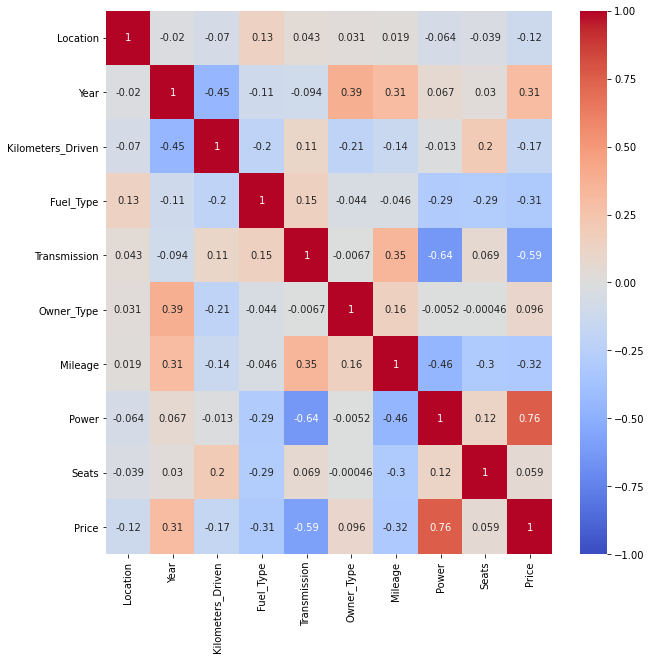

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(datacor.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

INSIGHT TAMBAHAN

In [ ]:
Manual = datakm.loc[(datakm['Transmission'] == 1)]
Manual.groupby('Year').count()['Transmission']
#Manual

Year
1998      1
2003      1
2004      6
2005      9
2006     11
2007     20
2008     40
2009     67
2010     77
2011    131
2012    143
2013    179
2014    222
2015    221
2016    228
2017    197
2018    107
2019     46
Name: Transmission, dtype: int64

In [ ]:
Manual2 = datakm.loc[(datakm['Transmission'] == 2)]
Manual2.groupby('Year').count()['Transmission']

Year
1998      3
1999      2
2000      4
2001      6
2002     13
2003     14
2004     21
2005     44
2006     64
2007    102
2008    129
2009    128
2010    261
2011    330
2012    426
2013    464
2014    567
2015    519
2016    511
2017    388
2018    190
2019     56
Name: Transmission, dtype: int64

In [ ]:
Petrol = data2.loc[(data2['Fuel_Type'] == 'Petrol')]
Petrol.groupby('Year').count()['Fuel_Type']

Year
1998      3
1999      2
2000      2
2001      5
2002     10
2003     12
2004     25
2005     37
2006     56
2007     89
2008    107
2009    114
2010    208
2011    236
2012    197
2013    226
2014    292
2015    291
2016    331
2017    267
2018    154
2019     46
Name: Fuel_Type, dtype: int64

In [ ]:
Diesel = data2.loc[(data2['Fuel_Type'] == 'Diesel')]
Diesel.groupby('Year').count()['Fuel_Type']

Year
1998      1
2000      2
2001      1
2002      3
2003      3
2004      2
2005     15
2006     19
2007     32
2008     60
2009     81
2010    125
2011    223
2012    361
2013    408
2014    485
2015    440
2016    404
2017    314
2018    139
2019     55
Name: Fuel_Type, dtype: int64

In [ ]:
CNG = data2.loc[(data2['Fuel_Type'] == 'CNG')]
CNG.groupby('Year').count()['Fuel_Type']

Year
2005     1
2008     1
2010     3
2011     1
2012     7
2013     9
2014    11
2015     9
2016     4
2017     5
2018     4
2019     1
Name: Fuel_Type, dtype: int64

In [ ]:
LPG = data2.loc[(data2['Fuel_Type'] == 'LPG')]
LPG.groupby('Year').count()['Fuel_Type']

Year
2007    1
2008    1
2010    2
2011    1
2012    4
2014    1
Name: Fuel_Type, dtype: int64

In [ ]:
MobilMahal = data2.loc[(data2['Merk'] == 'Lamborghini') | (data2['Merk'] == 'Bentley') | (data2['Merk'] == 'Porsche')]
MobilMahal

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
3635,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.5,4806,500.0,5.0,14.50,Porsche
4965,Porsche Cayenne Diesel,Mumbai,2013,70000,Diesel,Automatic,First,15.15,2967,240.0,5.0,40.00,Porsche
1759,Porsche Cayenne S Diesel,Coimbatore,2016,65003,Diesel,Automatic,First,13.6,4134,382.0,5.0,67.83,Porsche
1180,Porsche Cayenne Diesel,Coimbatore,2015,60395,Diesel,Automatic,First,16.12,2967,245.0,5.0,45.82,Porsche
26,Porsche Panamera Diesel 250hp,Kochi,2014,60033,Diesel,Automatic,First,18.18,2967,250.0,4.0,51.52,Porsche
45,Porsche Panamera Diesel,Kochi,2015,54996,Diesel,Automatic,First,17.85,2967,300.0,4.0,60.95,Porsche
106,Porsche Panamera Diesel,Delhi,2013,48000,Diesel,Automatic,Second,17.85,2967,300.0,4.0,50.50,Porsche
87,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6,5998,552.0,4.0,59.00,Bentley
1572,Porsche Cayenne 2009-2014 Diesel,Kochi,2015,47877,Diesel,Automatic,First,15.15,2967,240.0,5.0,48.22,Porsche
37,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.0,4806,394.3,4.0,42.91,Porsche
